In [16]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import os

In [5]:
class Args:
    pass
    
args = Args()
args.batch_size = 200
args.cuda = True
args.lr = 0.001
args.momentum = 0.01
args.epochs = 10
args.log_interval = 10

basedir = "Mnist_MLP_Multiple_models"

In [12]:

kwargs = {'num_workers': 1, 'pin_memory': True} if args.cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args.batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, 
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=args.batch_size, shuffle=True, **kwargs)

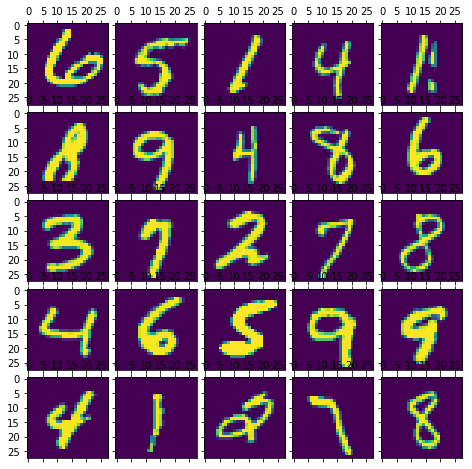

[[ 6.  5.  1.  4.  1.]
 [ 8.  9.  4.  8.  6.]
 [ 3.  7.  2.  7.  8.]
 [ 4.  6.  5.  9.  9.]
 [ 4.  1.  2.  7.  8.]]


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
import pprint
import numpy 

num_of_samples = 5

fig = plt.figure(1,(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(num_of_samples, num_of_samples),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

output = numpy.zeros(num_of_samples ** 2)
for i, (data, target) in enumerate(test_loader):
    if i < 1:
        for j in range(num_of_samples ** 2):
            grid[j].matshow(Image.fromarray(data[j][0].numpy()))
            output[j] = target[j]
            
    else:
        break
            
output = output.reshape(num_of_samples,num_of_samples)
plt.show()
print(output)

In [14]:
class Model0(nn.Module):
    def __init__(self):
        super(Model0, self).__init__()
        self.output_layer = nn.Linear(28*28, 10)
        
    def forward(self, x):
        x = self.output_layer(x)
        return F.log_softmax(x)

class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.input_layer = nn.Linear(28*28, 5)
        self.output_layer = nn.Linear(5, 10)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.output_layer(x)
        return F.log_softmax(x)

class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.input_layer = nn.Linear(28*28, 6)
        self.output_layer = nn.Linear(6, 10)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.output_layer(x)
        return F.log_softmax(x)

class Model3(nn.Module):    
    def __init__(self):
        super(Model3, self).__init__()
        self.input_layer = nn.Linear(28*28, 7)
        self.output_layer = nn.Linear(7, 10)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.output_layer(x)
        return F.log_softmax(x)

class Model4(nn.Module):
    def __init__(self):
        super(Model4, self).__init__()
        self.input_layer = nn.Linear(28*28, 8)
        self.output_layer = nn.Linear(8, 10)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.output_layer(x)
        return F.log_softmax(x)


class Model5(nn.Module):
    def __init__(self):
        super(Model5, self).__init__()
        self.input_layer = nn.Linear(28*28, 9)
        self.output_layer = nn.Linear(9, 10)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.output_layer(x)
        return F.log_softmax(x)

class Model6(nn.Module):    
    def __init__(self):
        super(Model6, self).__init__()
        self.input_layer = nn.Linear(28*28, 10)
        self.output_layer = nn.Linear(10, 10)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.output_layer(x)
        return F.log_softmax(x)

class Model7(nn.Module):
    def __init__(self):
        super(Model7, self).__init__()
        self.input_layer = nn.Linear(28*28, 100)
        self.output_layer = nn.Linear(100, 10)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.output_layer(x)
        return F.log_softmax(x)


class Model8(nn.Module):
    def __init__(self):
        super(Model8, self).__init__()
        self.input_layer = nn.Linear(28*28, 100)
        self.hidden_layer = nn.Linear(100, 100)
        self.output_layer = nn.Linear(100, 10)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.hidden_layer(x)
        x = self.output_layer(x)
        return F.log_softmax(x)

class Model9(nn.Module):
    def __init__(self):
        super(Model9, self).__init__()
        self.input_layer = nn.Linear(28*28, 100)
        self.hidden_layer = nn.Linear(100, 100)
        self.hidden_layer1 = nn.Linear(100, 100)
        self.output_layer = nn.Linear(100, 10)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.hidden_layer(x)
        x = self.hidden_layer1(x)
        x = self.output_layer(x)        
        return F.log_softmax(x)
    
class Model10(nn.Module):
    def __init__(self):
        super(Model10, self).__init__()
        self.input_layer = nn.Linear(28*28, 100)
        self.hidden_layer = nn.Linear(100, 100)
        self.hidden_layer1 = nn.Linear(100, 100)
        self.hidden_layer2 = nn.Linear(100, 100)
        self.output_layer = nn.Linear(100, 10)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.hidden_layer(x)
        x = self.hidden_layer1(x)
        x = self.hidden_layer2(x)
        x = self.output_layer(x)
        return F.log_softmax(x)
    

class Model11(nn.Module):
    def __init__(self):
        super(Model11, self).__init__()
        self.input_layer = nn.Linear(28*28, 100)
        self.hidden_layer = nn.Linear(100, 100)
        self.hidden_layer1 = nn.Linear(100, 100)
        self.hidden_layer2 = nn.Linear(100, 100)
        self.hidden_layer3 = nn.Linear(100, 100)
        self.output_layer = nn.Linear(100, 10)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.hidden_layer(x)
        x = self.hidden_layer1(x)
        x = self.hidden_layer2(x)
        x = self.hidden_layer3(x)
        x = self.output_layer(x)
        return F.log_softmax(x)

In [7]:
models = Model0(), Model1(), Model2(), Model3(), Model4(), Model5(), Model6(), Model7(), Model8(), Model9(), Model10(), Model11()
if args.cuda:
    for model in models:
        model.cuda()
        

In [8]:
def train(epoch, model, print_every=100, file_path='ckpt.pth'):
    optimizer = optim.SGD(model.parameters(),
           lr=args.lr, momentum=args.momentum)
    losses = []
    for i in range(epoch + 1):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            if args.cuda:
                data, target = data.cuda(), target.cuda()
            
            data = data.view(args.batch_size , -1)
            data, target = Variable(data), Variable(target)
            optimizer.zero_grad()
            output = model(data)
            
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            
        losses.append(loss.data[0])
        torch.save(model.state_dict(), file_path)        
        if i % print_every == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    i, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.data[0]))
    return losses

In [19]:
model_losses = []
for i, model in enumerate(models): 
    losses = train(1000, model, file_path=os.path.join(basedir,'model{}.pth'.format(i)))
    model_losses.append(losses)
    
for losses in model_losses:
    plt.plot(range(len(losses)), losses)
    plt.show()

Train Epoch: 0 [59800/60000 (100%)]	Loss: 0.902932


Process Process-4:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paarulakan/environments/python/pytorch-py35/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/paarulakan/environments/python/pytorch-py35/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 34, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/paarulakan/environments/python/pytorch-py35/lib/python3.5/site-packages/torchvision/datasets/mnist.py", line 55, in __getitem__
    img = self.transform(img)
  File "/home/paarulakan/environments/python/pytorch-py35/lib/python3.5/site-packages/torchvision/transforms.py", line 29, in __call__
    img = t(img)

KeyboardInterrupt: 

In [12]:
for i, model in enumerate(models):
    torch.save(model.state_dict(), 
               os.path.join(basedir, 'model{}.pth'.format(i)))

In [20]:
models = Model0(), Model1(), Model2(), Model3(), Model4(), Model5(), Model6(), Model7(), Model8(), Model9(), Model10()
if args.cuda:
    for model in models:
        model.cuda()
        
for i, model in enumerate(models):
    model.load_state_dict(
        torch.load(os.path.join(basedir, 'model{}.pth'.format(i))))

In [21]:
def test_tuts(model):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if args.cuda:
            data, target = data.cuda(), target.cuda()
        
        data = data.view(data.size()[0], -1)
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target).data[0]
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    test_loss = test_loss
    test_loss /= len(test_loader) # loss function already averages over batch size
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    return 100. * correct / len(test_loader.dataset)


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
import pprint
import numpy 


accuracy = []
for model in models:
    accuracy.append(test_tuts(model))
    
pprint.pprint(accuracy)



Test set: Average loss: 0.2663, Accuracy: 9253/10000 (93%)


Test set: Average loss: 0.3568, Accuracy: 9030/10000 (90%)


Test set: Average loss: 0.3244, Accuracy: 9119/10000 (91%)


Test set: Average loss: 0.2928, Accuracy: 9216/10000 (92%)


Test set: Average loss: 0.2816, Accuracy: 9236/10000 (92%)


Test set: Average loss: 0.2654, Accuracy: 9257/10000 (93%)


Test set: Average loss: 0.2658, Accuracy: 9257/10000 (93%)


Test set: Average loss: 0.2662, Accuracy: 9250/10000 (92%)


Test set: Average loss: 0.2677, Accuracy: 9259/10000 (93%)


Test set: Average loss: 0.2715, Accuracy: 9269/10000 (93%)


Test set: Average loss: 0.2720, Accuracy: 9265/10000 (93%)

[92.53, 90.3, 91.19, 92.16, 92.36, 92.57, 92.57, 92.5, 92.59, 92.69, 92.65]


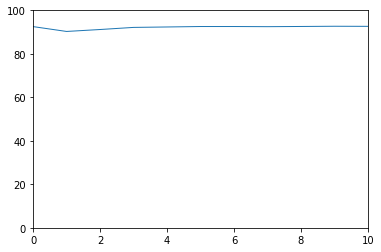

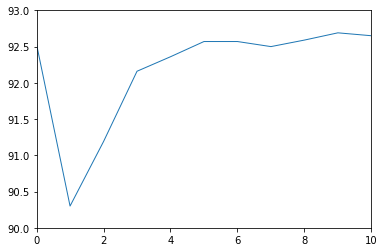

In [23]:
plt.plot(range(len(accuracy)), accuracy, linewidth=1.0)
plt.axis([0, 10, 0, 100])
plt.show()

plt.plot(range(len(accuracy)), accuracy, linewidth=1.0)
plt.axis([0, 10, 90, 93])
plt.show()

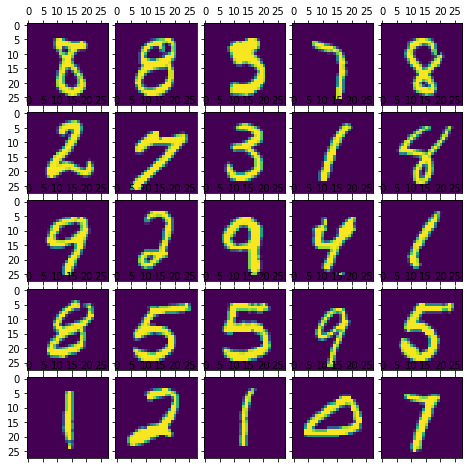

[[ 8.  8.  3.  7.  8.]
 [ 2.  7.  3.  1.  4.]
 [ 9.  2.  9.  4.  1.]
 [ 8.  5.  5.  9.  5.]
 [ 1.  2.  1.  0.  7.]]


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
import pprint
import numpy 

num_of_samples = 5

fig = plt.figure(1,(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(num_of_samples, num_of_samples),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

output = numpy.zeros(num_of_samples ** 2)
for i, (data, target) in enumerate(test_loader):
    if i < 1:
        
        data1 = data.cuda()
        data1 = data1.view(data.size()[0], -1)
        out = models[9](Variable(data1))
        #data = data.view(data.size()[0], -1)
        for j in range(num_of_samples ** 2):
            
            grid[j].matshow(Image.fromarray(data[j][0].numpy()))
            output[j] = out.data.max(1)[1][j].cpu().numpy()[0]
            
    else:
        break
            
output = output.reshape(num_of_samples,num_of_samples)
plt.show()
print(output)